In this exercise you will:
1. Write you function $f(x, y)$
2. Use gradient descent with and without momentum to optimize $f(x, y)$ w.r.t. the vector $[x, y]^T$. The learning algorithms have been implemented for you.
3. Repeat steps 1--2 with a bunch of different functions.
% 3. Fit a linear regression model to data using the gradient-based algorithms. %


In [1]:
import autograd.numpy as np
import autograd
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=3)
import time

# helper function for plotting isocontours
def plot_isocontours(x_points, y_points, g):
    """
    first makes a 2d grid from the 1d grid
    then plots isocontours using the function g
    """
    X,Y = np.meshgrid(x_points, y_points)  # build 2d grid
    Z = np.zeros_like(X)
    for i in range(len(X)):
        for j in range(len(X.T)):
            Z[i, j] = g(np.array((X[i, j], Y[i, j])))  # compute function values
    fig, ax = plt.subplots()
    im = ax.contour(X, Y, Z, 100)
    plt.colorbar(im, ax=ax)
#    plt.colorbar()
    return fig, ax

# 1. Write your own function f(x, y) using the template below. 
x and y are represented by the 2d vector `xy` 


In [2]:
# write forward function
def f(xy):
    x, y = xy[0], xy[1]
    output = x**2 + 2.0*y**2 + 0.25*x**2*y**2  # an easy one
#    output = np.log(x**2 + 0.25*y**2) + 0.01*x**2*y**2  # write your own function by changing this expression
    # remember that only convex functions have well-definied and unique global minima 
    return output

# differentiate f(x) w.r.t. x
df = autograd.grad(f)

plot isocontours of $f(x, y)$ and $\nabla_{x, y}f(x, y)$ 

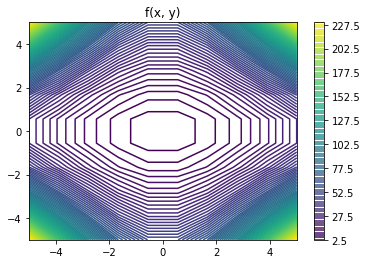

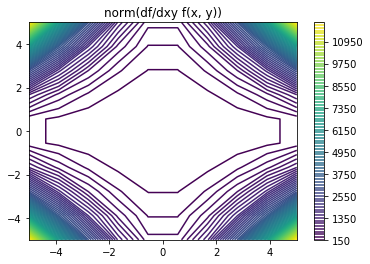

In [3]:
x_points = np.linspace(-5, 5, 10)  # optionally change the plot limits here
y_points = np.linspace(-5, 5, 10)

df_norm = lambda xy: np.sum(np.square(df(xy)))

fig, ax = plot_isocontours(x_points, y_points, f)
ax.set_title('f(x, y)')
fig, ax = plot_isocontours(x_points, y_points, df_norm)
ax.set_title('norm(df/dxy f(x, y))')
plt.show()



# 2 tune hyperparameters to find the function minimum in the least number of iterations

final value f(x, y)=0.000 at (x, y)=(-0.000, -0.000)


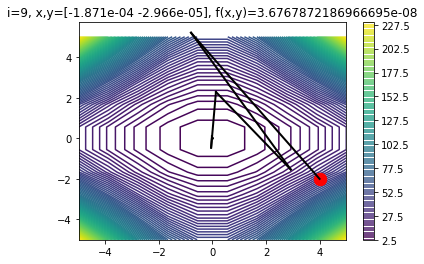

In [4]:
fig, ax = plot_isocontours(x_points, y_points, f)  # plot function isocontours

# hyperparameters
#INITIAL_VAL = np.random.randn(2)
INITIAL_VAL = np.array([4., -2.])
USE_MOMENTUM = False
LEARNING_RATE = 0.3
ALPHA = 0.8
N_ITER = 10  # see if you can reach the function minimum in as few iterations as possible

# initialize
xy = np.copy(INITIAL_VAL)
delta = np.zeros(2)
ax.plot(*xy, color='r', marker='.', ms=25)  # plot initial values


from IPython import display

for i in range(N_ITER):
#    input("Press Enter to continue...")  # optional; Enter key triggers next update
#    time.sleep(0.5)  # optional; slow down animation if the flickering is distracting

    xy_old = np.copy(xy)
    g = df(xy)  # compute standard gradient
    if USE_MOMENTUM:
        delta = -LEARNING_RATE*g + ALPHA*delta  # update momentum term
    else:
        delta = -LEARNING_RATE*g
    xy += delta  # update params
    
    # plot
    ax.plot([xy_old[0], xy[0]], [xy_old[1], xy[1]],'-k',lw=2)  # plot a line connecting old and new param values
    fig.canvas.draw()
    ax.set_title('i={}, x,y={}, f(x,y)={}'.format(i, xy, f(xy)))
    display.display(fig)
    display.clear_output(wait=True)

print('final value f(x, y)={:.3f} at (x, y)=({:.3f}, {:.3f})'.format(f(xy), xy[0], xy[1]))


# 3. repeat steps 1--2 with a new function!